### fib function

In [1]:
def recur_fibo(n):
   if n <= 1:
       return n
   else:
       return(recur_fibo(n-1) + recur_fibo(n-2))

In [2]:
from ctypes import CDLL, c_uint, c_int
import time
import matplotlib.pyplot as plt
import numpy as np

### implementation

In [3]:
lib = CDLL("../pmu_test/libcycletime.so")

lib.pmu_init.argtypes = [c_int, c_int]
lib.pmu_get_cyclecount.restype = c_uint

In [4]:
lib.pmu_init(1, 0)

1

In [5]:
def cycle_diff(c1, c0):
    MAX32 = 2**32
    if c1 >= c0:
        return c1 - c0
    else:
        return (MAX32 - c0) + c1

In [6]:
def fibo_duration(n):
    t0 = time.time()
    c0 = lib.pmu_get_cyclecount()
    recur_fibo(n)
    c1 = lib.pmu_get_cyclecount()
    t1 = time.time()

    time_elapsed = t1 - t0
    cycle_elapsed = cycle_diff(c1, c0)
    return time_elapsed, cycle_elapsed

### gather cycles and times for different n for fibo function

In [7]:
n_values = [5, 8, 10, 12, 15, 18, 20, 22, 25, 28, 30]
num_trials = 5

In [13]:
time_avg = []
time_err = []
cycle_avg = []
cycle_err = []

for n in n_values:
    print(f"\n--- n = {n} ---")
    times = []
    cycles = []

    for trial in range(num_trials):
        t, c = fibo_duration(n)
        print(f"  trial {trial}: time = {t:.6f} s, cycles = {c}")
        times.append(t)
        cycles.append(c)

    times = np.array(times)
    cycles = np.array(cycles)

    # mean
    mean_time = times.mean()
    mean_cycle = cycles.mean()
    print(f"  mean_time = {mean_time:.6f} s")
    print(f"  mean_cycle = {mean_cycle}")

    time_avg.append(mean_time)
    cycle_avg.append(mean_cycle)

    # std
    std_time = np.sqrt(np.sum((times - mean_time) ** 2) / (num_trials - 1))
    time_err.append(std_time / np.sqrt(num_trials))

    std_cycle = np.sqrt(np.sum((cycles - mean_cycle) ** 2) / (num_trials - 1))
    cycle_err.append(std_cycle / np.sqrt(num_trials))
    print(f"  std_time = {std_time:.6f}, err_time = {time_err[-1]:.6f}")
    print(f"  std_cycle = {std_cycle:.6f}, err_cycle = {cycle_err[-1]:.6f}")


--- n = 5 ---
  trial 0: time = 0.000074 s, cycles = 29718
  trial 1: time = 0.000052 s, cycles = 25000
  trial 2: time = 0.000051 s, cycles = 24479
  trial 3: time = 0.000049 s, cycles = 23665
  trial 4: time = 0.000048 s, cycles = 23708
  mean_time = 0.000055 s
  mean_cycle = 25314.0
  std_time = 0.000011, err_time = 0.000005
  std_cycle = 2524.355066, err_cycle = 1128.925905

--- n = 8 ---
  trial 0: time = 0.000180 s, cycles = 88891
  trial 1: time = 0.000143 s, cycles = 83242
  trial 2: time = 0.000140 s, cycles = 82664
  trial 3: time = 0.000140 s, cycles = 82484
  trial 4: time = 0.000137 s, cycles = 80792
  mean_time = 0.000148 s
  mean_cycle = 83614.6
  std_time = 0.000018, err_time = 0.000008
  std_cycle = 3087.401626, err_cycle = 1380.727982

--- n = 10 ---
  trial 0: time = 0.000339 s, cycles = 207238
  trial 1: time = 0.001081 s, cycles = 687519
  trial 2: time = 0.000329 s, cycles = 203582
  trial 3: time = 0.000324 s, cycles = 201614
  trial 4: time = 0.000324 s, cycles

### plot!

In [14]:
freq = 650e6

cycle_time_avg = np.array(cycle_avg) / freq
cycle_time_err = np.array(cycle_err) / freq

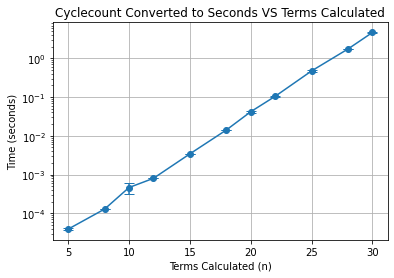

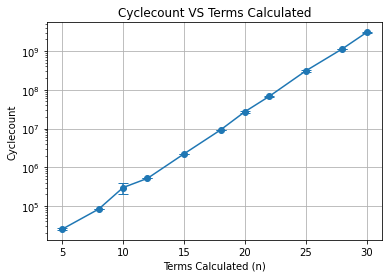

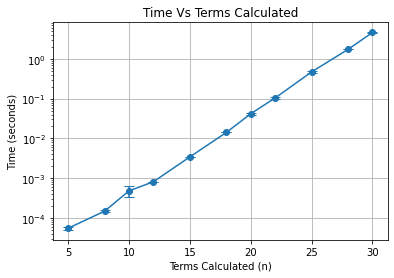

In [17]:
import matplotlib.pyplot as plt

plt.figure()
plt.errorbar(n_values, cycle_time_avg, yerr=cycle_time_err, fmt='o-', capsize=5)
plt.yscale("log")
plt.xlabel("Terms Calculated (n)")
plt.ylabel("Time (seconds)")
plt.title("Cyclecount Converted to Seconds VS Terms Calculated")
plt.grid(True)
plt.show()

plt.figure()
plt.errorbar(n_values, cycle_avg, yerr=cycle_err, fmt='o-', capsize=5)
plt.yscale("log")
plt.xlabel("Terms Calculated (n)")
plt.ylabel("Cyclecount")
plt.title("Cyclecount VS Terms Calculated")
plt.grid(True)
plt.show()

plt.figure()
plt.errorbar(n_values, time_avg, yerr=time_err, fmt='o-', capsize=5)
plt.yscale("log")
plt.xlabel("Terms Calculated (n)")
plt.ylabel("Time (seconds)")
plt.title("Time Vs Terms Calculated")
plt.grid(True)
plt.show()

